# Headers

In [ ]:
import numpy as np
import keras
from keras import layers
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D # convolution layers
from keras.layers import Dense, Dropout, Flatten # core layers

# Load Data

In [ ]:
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#check image shape
print(x_train[0].shape)

(28, 28)


In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

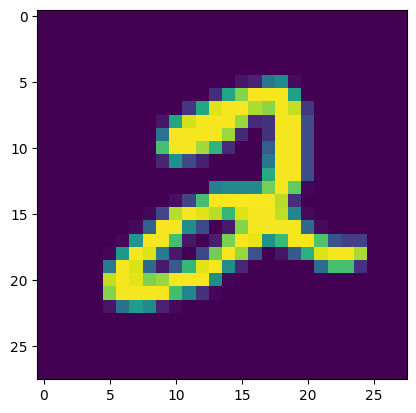

In [ ]:
#plot the first image in the dataset
plt.imshow(x_train[5])

In [ ]:
print(x_train[1].shape)
print(x_train.shape)
print(x_train.shape[0])

(28, 28)
(60000, 28, 28)
60000


In [ ]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Model Architecture

In [ ]:
model = keras.Sequential()

model.add(Conv2D(filters=32, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(num_classes,activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 10)                1

# Training and Evaluation

In [ ]:
batch_size = 128
epochs = 15

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 6s 6ms/step - loss: 0.3071 - accuracy: 0.9137 - val_loss: 0.0853 - val_accuracy: 0.9760
Epoch 2/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0807 - accuracy: 0.9754 - val_loss: 0.0592 - val_accuracy: 0.9837
Epoch 3/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0597 - accuracy: 0.9811 - val_loss: 0.0493 - val_accuracy: 0.9870
Epoch 4/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0497 - accuracy: 0.9849 - val_loss: 0.0475 - val_accuracy: 0.9873
Epoch 5/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0416 - accuracy: 0.9873 - val_loss: 0.0434 - val_accuracy: 0.9892
Epoch 6/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0353 - accuracy: 0.9890 - val_loss: 0.0530 - val_accuracy: 0.9847
Epoch 7/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0309 - accuracy: 0.9904 - val_loss: 0.0450 - val_accuracy: 0.9865
Epoch 

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03422902151942253
Test accuracy: 0.9901000261306763


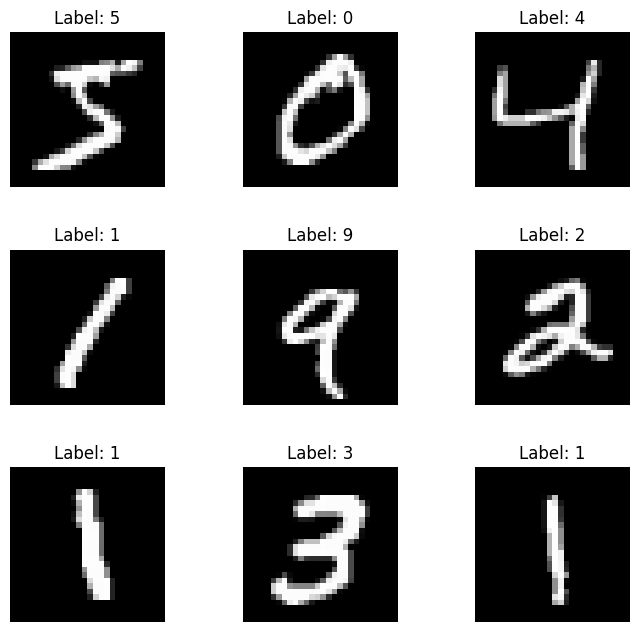

In [ ]:
# Visualize first 9 images in the dataset
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
axes = axes.ravel()

for i in range(9):
    axes[i].imshow(x_train[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Label: {np.argmax(y_train[i])}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)
plt.show()


Epoch 1/15
422/422 [==============================] - 5s 12ms/step - loss: 0.0093 - accuracy: 0.9971 - val_loss: 0.0393 - val_accuracy: 0.9903
Epoch 2/15
422/422 [==============================] - 3s 6ms/step - loss: 0.0082 - accuracy: 0.9975 - val_loss: 0.0426 - val_accuracy: 0.9907
Epoch 3/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0066 - accuracy: 0.9980 - val_loss: 0.0469 - val_accuracy: 0.9897
Epoch 4/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0067 - accuracy: 0.9975 - val_loss: 0.0450 - val_accuracy: 0.9907
Epoch 5/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0052 - accuracy: 0.9984 - val_loss: 0.0537 - val_accuracy: 0.9902
Epoch 6/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0055 - accuracy: 0.9982 - val_loss: 0.0491 - val_accuracy: 0.9897
Epoch 7/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0044 - accuracy: 0.9986 - val_loss: 0.0528 - val_accuracy: 0.9903
Epoch

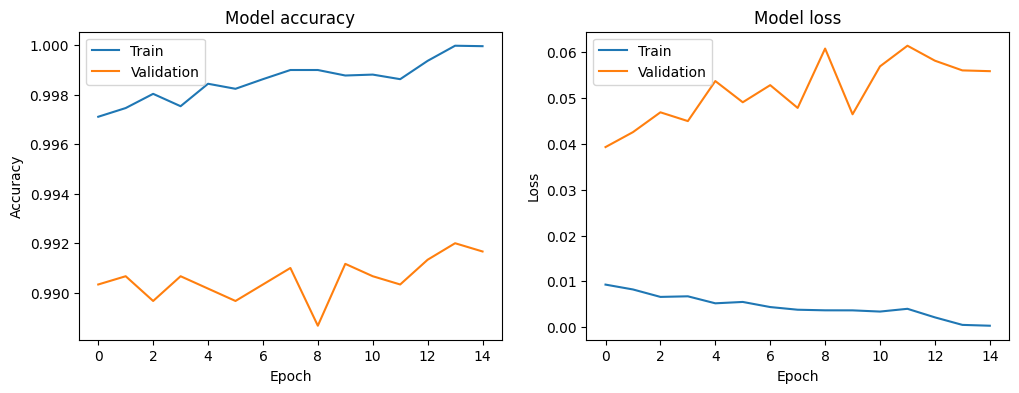

In [ ]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Plotting training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


313/313 [==============================] - 1s 2ms/step


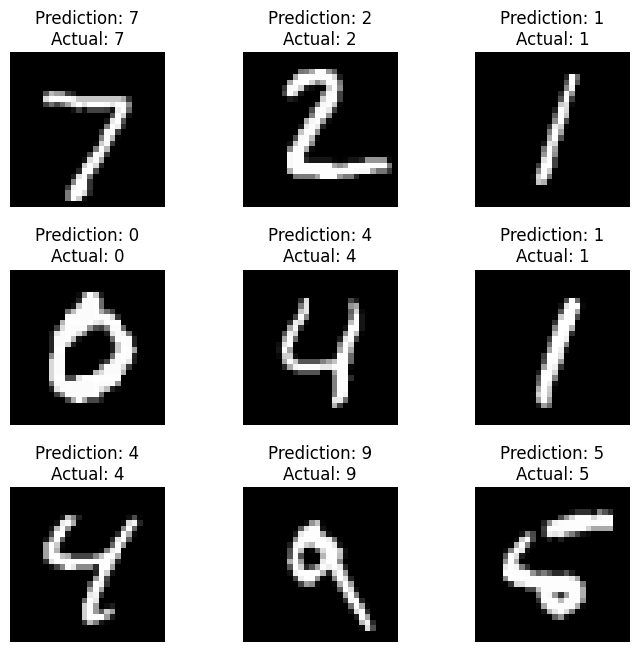

In [ ]:
predictions = model.predict(x_test)

# Visualize first 9 test images and their predictions
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
axes = axes.ravel()

for i in range(9):
    axes[i].imshow(x_test[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Prediction: {np.argmax(predictions[i])}\nActual: {np.argmax(y_test[i])}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)
plt.show()


Adding Dropout

Conv2D Layers: 32 filters, (3,3) and 64 filters, (3,3)
Dropout: 0.25 after each MaxPooling2D layer, 0.5 before Dense layer
Dense Layer: 128 neurons before the output layer
Regularization: None

In [ ]:
model = keras.Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [ ]:
batch_size = 128
epochs = 15

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 6s 6ms/step - loss: 0.3848 - accuracy: 0.8804 - val_loss: 0.0694 - val_accuracy: 0.9795
Epoch 2/15
422/422 [==============================] - 2s 5ms/step - loss: 0.1367 - accuracy: 0.9593 - val_loss: 0.0507 - val_accuracy: 0.9857
Epoch 3/15
422/422 [==============================] - 3s 7ms/step - loss: 0.1013 - accuracy: 0.9699 - val_loss: 0.0429 - val_accuracy: 0.9870
Epoch 4/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0817 - accuracy: 0.9748 - val_loss: 0.0386 - val_accuracy: 0.9887
Epoch 5/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0716 - accuracy: 0.9780 - val_loss: 0.0335 - val_accuracy: 0.9910
Epoch 6/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0646 - accuracy: 0.9808 - val_loss: 0.0350 - val_accuracy: 0.9887
Epoch 7/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0593 - accuracy: 0.9819 - val_loss: 0.0302 - val_accuracy: 0.9910
Epoch 

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.022843576967716217
Test accuracy: 0.9925000071525574


Adding L2 Regularization

Conv2D Layers: 32 filters, (3,3) and 64 filters, (3,3) with L2 regularization
Dropout: 0.25 after each MaxPooling2D layer, 0.5 before Dense layer
Dense Layer: 128 neurons before the output layer
Regularization: L2 with 0.001

In [ ]:
from keras.regularizers import l2

model = keras.Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1), kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu", kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation="relu", kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [ ]:
batch_size = 128
epochs = 15

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 7s 7ms/step - loss: 0.6035 - accuracy: 0.8773 - val_loss: 0.2502 - val_accuracy: 0.9780
Epoch 2/15
422/422 [==============================] - 3s 7ms/step - loss: 0.2980 - accuracy: 0.9549 - val_loss: 0.1875 - val_accuracy: 0.9842
Epoch 3/15
422/422 [==============================] - 2s 5ms/step - loss: 0.2376 - accuracy: 0.9652 - val_loss: 0.1592 - val_accuracy: 0.9860
Epoch 4/15
422/422 [==============================] - 2s 5ms/step - loss: 0.2154 - accuracy: 0.9673 - val_loss: 0.1485 - val_accuracy: 0.9885
Epoch 5/15
422/422 [==============================] - 2s 5ms/step - loss: 0.2012 - accuracy: 0.9696 - val_loss: 0.1440 - val_accuracy: 0.9882
Epoch 6/15
422/422 [==============================] - 2s 6ms/step - loss: 0.2007 - accuracy: 0.9700 - val_loss: 0.1443 - val_accuracy: 0.9860
Epoch 7/15
422/422 [==============================] - 4s 8ms/step - loss: 0.1922 - accuracy: 0.9716 - val_loss: 0.1387 - val_accuracy: 0.9873
Epoch 

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.12447315454483032
Test accuracy: 0.9901000261306763


 Increasing Filters

Conv2D Layers: 64 filters, (3,3) and 128 filters, (3,3)
Dropout: 0.25 after each MaxPooling2D layer, 0.5 before Dense layer
Dense Layer: 128 neurons before the output layer
Regularization: L2 with 0.001

In [ ]:
model = keras.Sequential()
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1), kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation="relu", kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation="relu", kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


NameError: name 'l2' is not defined

In [ ]:
batch_size = 128
epochs = 15

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 7s 9ms/step - loss: 0.5402 - accuracy: 0.9018 - val_loss: 0.2353 - val_accuracy: 0.9818
Epoch 2/15
422/422 [==============================] - 4s 9ms/step - loss: 0.2732 - accuracy: 0.9615 - val_loss: 0.1847 - val_accuracy: 0.9835
Epoch 3/15
422/422 [==============================] - 4s 9ms/step - loss: 0.2293 - accuracy: 0.9679 - val_loss: 0.1607 - val_accuracy: 0.9863
Epoch 4/15
422/422 [==============================] - 3s 8ms/step - loss: 0.2176 - accuracy: 0.9686 - val_loss: 0.1595 - val_accuracy: 0.9860
Epoch 5/15
422/422 [==============================] - 3s 8ms/step - loss: 0.2088 - accuracy: 0.9708 - val_loss: 0.1487 - val_accuracy: 0.9897
Epoch 6/15
422/422 [==============================] - 4s 9ms/step - loss: 0.1994 - accuracy: 0.9733 - val_loss: 0.1487 - val_accuracy: 0.9882
Epoch 7/15
422/422 [==============================] - 4s 9ms/step - loss: 0.1929 - accuracy: 0.9742 - val_loss: 0.1461 - val_accuracy: 0.9892
Epoch 

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.12872084975242615
Test accuracy: 0.9894000291824341


Conclusion

Adding dropout significantly reduces the loss and slightly improves accuracy, indicating effective reduction of overfitting. L2 regularization yields the highest accuracy with moderate loss reduction, enhancing overall performance. Increasing filters slightly improves loss but doesn't significantly affect accuracy, suggesting limited benefit from increased complexity.